# Figuras (a)-(c)

Para graficar los niveles de energia de un island-based qubit, uso el hamiltoniano de la eq. (16)
$$
\hat{\mathcal{H}}_q = 4 E_C (\hat{N} - N_{ext})^{2} - E_J \cos{\hat{\phi}},
$$

requerimos como minimo los dos estados mas bajos, estos serán los dos autovalores mas bajos del hamiltoniano, la dimensión del hamiltoniano depende del numero de pares de Cooper que usemos, entonces centramos el cálculo en los estados $|-n\rangle ,|-n+1\rangle, \cdots, |-1\rangle , |0\rangle , |1\rangle , \cdots, |n-1\rangle , |n\rangle$, con la elección de un $n$, el hamiltoniano tendra $2*n + 1$ autovalores. Con $n = 1$, seria suficiente, pero para los fines ilustrativos, $n=5$ es más que suficiente.

Para construir el hamiltoniano en forma matricial, los elementos de la diagonal tomarán los valores de el término con el operador $|\hat{N}\rangle$. El término del potencial $-E_J \cos{\hat{\varphi}}$ debe expresarse en términos de la base de estados de número. Dado que $[\hat{\varphi}, \hat{N}] = i$, se puede usar la primera ecuación en la Tabla II con $\hat{B} = \hat{N}$ y $\hat{A} = i \hat{\varphi}$ resulta en

$$
\begin{align*}
e^{i \hat{\varphi}} \hat{N} e^{-i \hat{\varphi}} &= \hat{N} + i \cdot i \\
&= \hat{N} - 1 ,
\end{align*}
$$

y para $\hat{A} = -i \hat{\varphi}$

$$
\begin{align*}
e^{-i \hat{\varphi}} \hat{N} e^{i \hat{\varphi}} &= \hat{N} - i \cdot i \\
&= \hat{N} + 1 .
\end{align*}
$$

Si aplicamos el operador $e^{-i \hat{\varphi}}$ sobre $e^{i \hat{\varphi}} \hat{N} e^{-i \hat{\varphi}}$

$$
\begin{align*}
e^{-i \hat{\varphi}} (e^{i \hat{\varphi}} \hat{N} e^{-i \hat{\varphi}} |n\rangle) &= 
\hat{N} (e^{-i \hat{\varphi}} |n\rangle ) \\
e^{-i \hat{\varphi}} (n-1) |n\rangle &= \hat{N} (e^{-i \hat{\varphi}} |n\rangle ) \\
(n-1)(e^{-i \hat{\varphi}}  |n\rangle ) &= \hat{N} (e^{-i \hat{\varphi}} |n\rangle ) ,
\end{align*}
$$

de ello se tiene que $e^{\pm i \hat{\varphi}}  |n\rangle = |n\pm 1 \rangle$.

Entonces en el hamiltoniano
$$
\begin{align*}
\hat{\mathcal{H}}_q |n\rangle &= 4 E_C (\hat{N} - N_{ext})^{2}|n\rangle - E_J \cos{\hat{\phi}}|n\rangle \\
&= 4 E_C (n - N_{ext})^{2}|n\rangle - \frac{E_J}{2}(e^{i \hat{\varphi}} + e^{-i \hat{\varphi}}) |n\rangle \\
&= 4 E_C (n - N_{ext})^{2}|n\rangle - \frac{E_J}{2}(|n+1\rangle + |n-1\rangle) .
\end{align*}
$$

Como se usará la razón $E_J/E_C = r$, hago $E_C= 1$ y $E_J = r$
$$
\hat{\mathcal{H}}_q |n\rangle = 4(n - N_{ext})^{2}|n\rangle - \frac{r}{2}(|n+1\rangle + |n-1\rangle),
$$

y se llenarán los elementos del hamiltoniano en forma de matriz. 

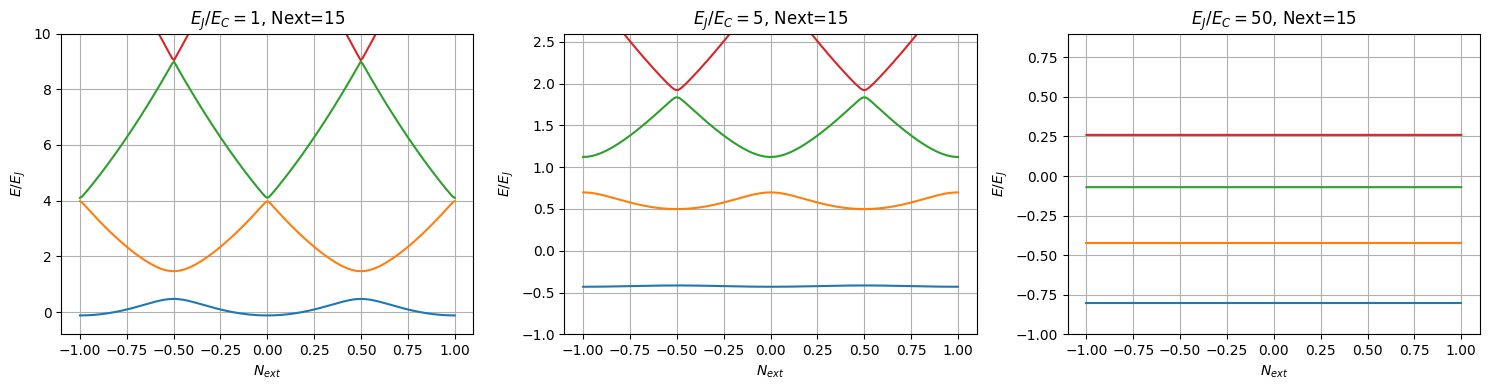

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def H_island(r, n, Nmax):
    dim = 2*Nmax + 1
    H = np.zeros((dim,dim))
    n_vals = np.arange(-Nmax, Nmax+1)

    for i, n_val in enumerate(n_vals):
        H[i,i] = 4*(n_val - n)**2

    for i in range(dim-1):
        H[i, i+1] = -r/2
        H[i+1, i] = -r/2

    return H

def H_island_a_c(r, ymin, ymax, Nmax):
    next_rango = np.linspace(-1.0, 1.0, 200)
    autovalores = []
    for next in next_rango:
        H = H_island(r,next, Nmax)
        E, _ = np.linalg.eigh(H)
        autovalores.append(E[:4])

    autovalores = np.array(autovalores)

    plt.figure(figsize=(5,4))
    for i in range(autovalores.shape[1]):
        plt.plot(next_rango, autovalores[:, i]/r, label=f"E{i}")

    plt.ylim(ymin, ymax)
    plt.xlabel("$N_{ext}$")
    plt.ylabel("$E/E_J$")
    plt.title(f"$E_J/E_C={r}$")
    plt.grid(True)
    plt.show()

def H_island_a_c_multi(r_list, ymin_list, ymax_list, Nmax_list):
    nplots = len(r_list)
    fig, axs = plt.subplots(1, nplots, figsize=(5*nplots, 4), sharey=False)

    if nplots == 1:
        axs = [axs]

    for ax, r, ymin, ymax, Nmax in zip(axs, r_list, ymin_list, ymax_list, Nmax_list):
        next_rango = np.linspace(-1.0, 1.0, 200)
        autovalores = []
        for next in next_rango:
            H = H_island(r, next, Nmax)
            E, _ = np.linalg.eigh(H)
            autovalores.append(E[:4])

        autovalores = np.array(autovalores)

        for i in range(autovalores.shape[1]):
            ax.plot(next_rango, autovalores[:, i]/r, label=f"E{i}")

        ax.set_ylim(ymin, ymax)
        ax.set_xlabel("$N_{ext}$")
        ax.set_ylabel("$E/E_J$")
        ax.set_title(f"$E_J/E_C={r}$, Next={Nmax}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

#H_island_a_c(1, -0.8, 10, 15)
#H_island_a_c(5, -1, 2.6, 15)
#H_island_a_c(50, -1, 0.9, 15)

r_vals = [1, 5, 50]
ymin_vals = [-0.8, -1, -1]
ymax_vals = [10, 2.6, 0.9]
Nmax_vals = [15, 15, 15]

H_island_a_c_multi(r_vals, ymin_vals, ymax_vals, Nmax_vals)

# Figura (f)

Podemos aproximar el potencial periodico en un armónico
$$
-E_J \cos{\varphi} = E_J \left( \frac{\varphi^{2}}{2} - 1 \right),
$$

por simplicidad, hago $E_J = 1$.

In [20]:
def per_arm():
    phi = np.linspace(-4, 4, 400)

    per = -np.cos(phi)
    arm = phi**2/2 - 1

    plt.figure(figsize=(5,4))
    plt.plot(phi, per, color="C0")
    plt.plot(phi, arm, "--", color="C1")
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_xticks([-np.pi, 0, np.pi])
    ax.set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
    plt.ylim(top=1.3)
    plt.xlabel(r"$\varphi$")
    plt.title(r"$E_J/E_C \gg 1$")
    plt.show()

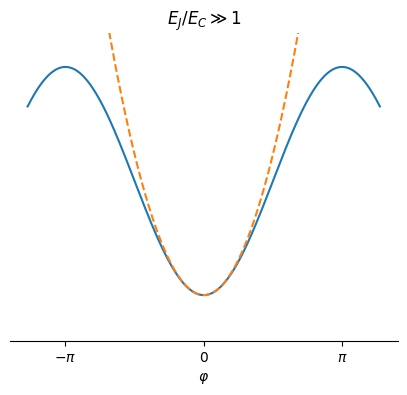

In [21]:
per_arm()

# Figuras (d)-(e)

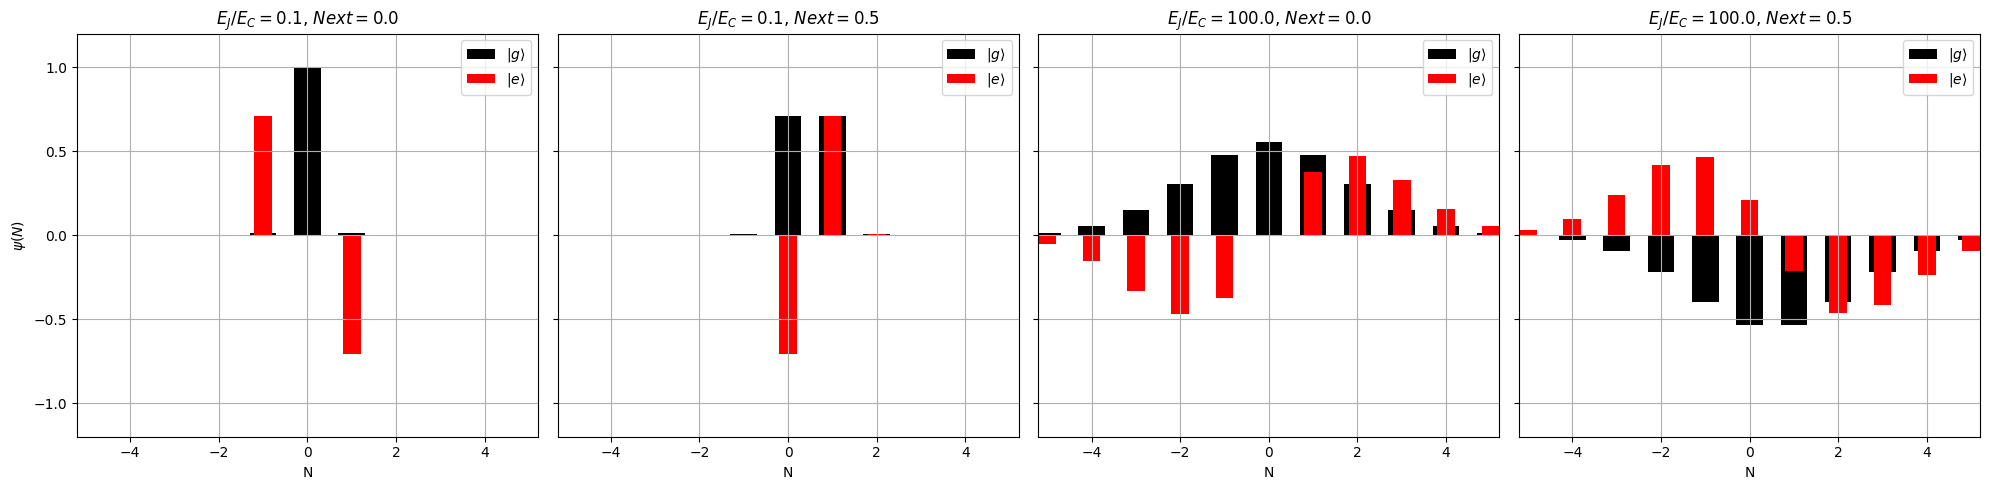

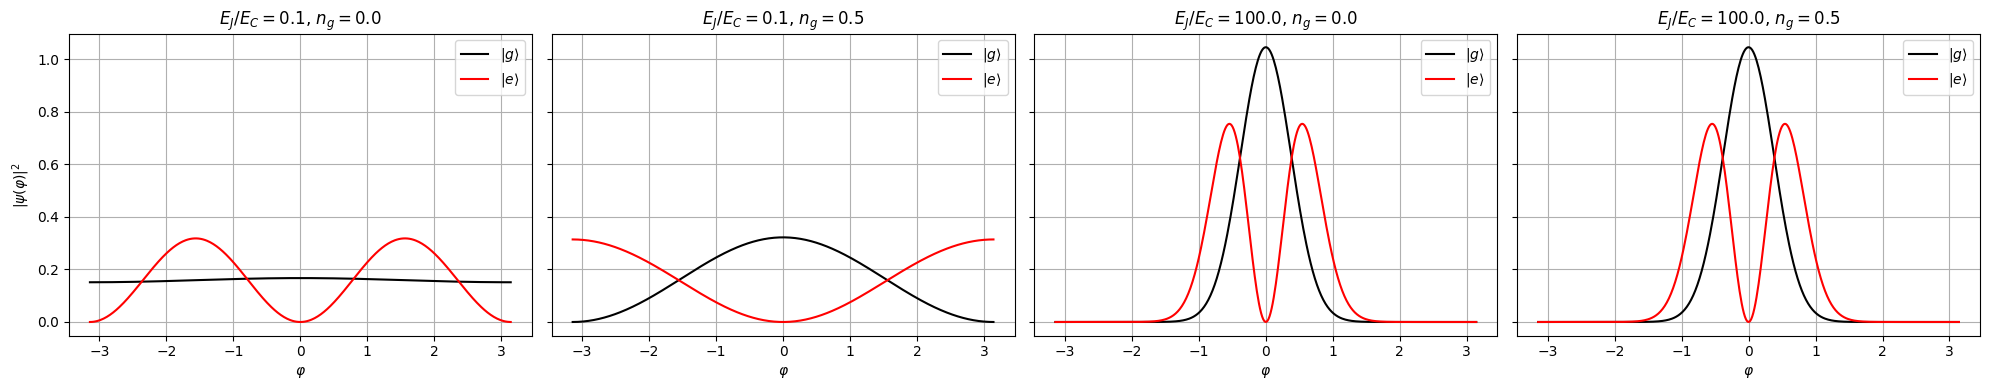

In [ ]:
def wave_n(r_list, Next_list, Nmax):
    n_vals = np.arange(-Nmax, Nmax+1)

    _, ejes = plt.subplots(1, len(r_list), figsize=(5*len(r_list), 5), sharey=True)

    if len(r_list) == 1:  
        ejes = [ejes]
    
    for ej, r, Next in zip(ejes, r_list, Next_list):
        _, evec = np.linalg.eigh(H_island(r, Next, Nmax))

        ej.bar(n_vals, evec[:, 0], color="black", width=0.6, label=r"$|g\rangle$")
        ej.bar(n_vals, evec[:, 1], color="red", width=0.4, label=r"$|e\rangle$")

        ej.set_title(f"$E_J/E_C = {r}$, $Next={Next}$")
        ej.set_xlabel("N")
        ej.set_xlim(-5.2, 5.2)
        ej.set_ylim(-1.2, 1.2)
        ej.grid(True)
        ej.legend()

    ejes[0].set_ylabel(r"$\psi(N)$")
    plt.tight_layout()
    plt.show()

def wave_phi(r_list, Next_list, Nmax=10):
    n_vals = np.arange(-Nmax, Nmax+1)
    phi = np.linspace(-np.pi, np.pi, 400)
    _, ejes = plt.subplots(1, len(r_list), figsize=(5*len(r_list), 4), sharey=True)

    if len(r_list) == 1:  
        ejes = [ejes]

    for ej, r, next in zip(ejes, r_list, Next_list):
        H = H_island(r, next, Nmax)
        _, evec = np.linalg.eigh(H)

        psi0 = np.zeros_like(phi, dtype=complex)
        psi1 = np.zeros_like(phi, dtype=complex)

        for idx, n in enumerate(n_vals):
            psi0 += evec[idx, 0] * np.exp(1j * n * phi)
            psi1 += evec[idx, 1] * np.exp(1j * n * phi)

        psi0 /= np.sqrt(2*np.pi)
        psi1 /= np.sqrt(2*np.pi)

        ej.plot(phi, np.abs(psi0)**2, color="black", label=r"$|g\rangle$")
        ej.plot(phi, np.abs(psi1)**2, color="red", label=r"$|e\rangle$")

        ej.set_title(f"$E_J/E_C = {r}$, $Next={next}$")
        ej.set_xlabel(r"$\varphi$")
        ej.grid(True)
        ej.legend()

    ejes[0].set_ylabel(r"$|\psi(\varphi)|^2$")
    plt.tight_layout()
    plt.show()

wave_n([0.1, 0.1, 100.0, 100.0], [0.0, 0.5, 0.0, 0.5], 12)
wave_phi([0.1, 0.1, 100.0, 100.0], [0.0, 0.5, 0.0, 0.5], 12)